In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris=sns.load_dataset('iris')

In [3]:
iris.head(200)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


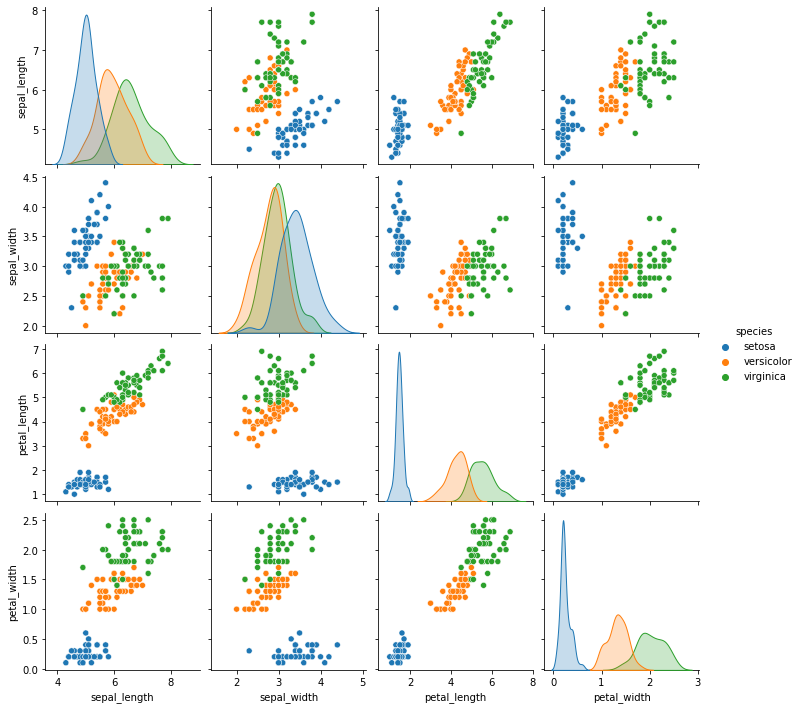

In [6]:
sns.pairplot(iris,hue='species')

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

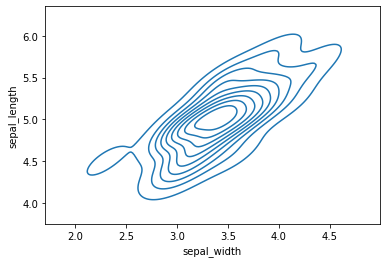

In [7]:
#Setosa
sns.kdeplot(x='sepal_width',y='sepal_length',data=iris[iris['species']=='setosa'])

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

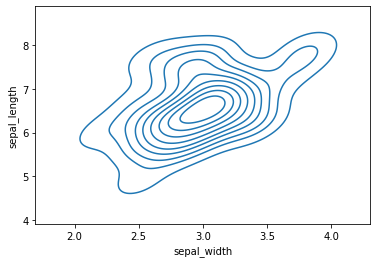

In [8]:
#Virginica
sns.kdeplot(x='sepal_width',y='sepal_length',data=iris[iris['species']=='virginica'])

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

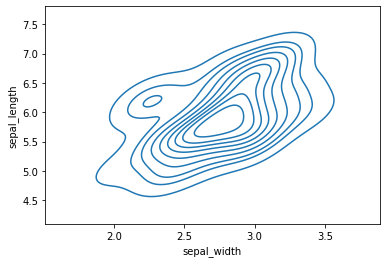

In [9]:
#Versicolor
sns.kdeplot(x='sepal_width',y='sepal_length',data=iris[iris['species']=='versicolor'])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(iris.drop('species',axis=1),iris['species'],random_state=101,test_size=0.33)

In [12]:
from sklearn.svm import SVC

In [13]:
model=SVC()

In [14]:
model.fit(x_train,y_train)

SVC()

In [15]:
pred=model.predict(x_test)

In [16]:
#comparison dataframe
pd.DataFrame({'Label':y_test,'Predictions':pred})

,Label,Predictions
33,setosa,setosa
16,setosa,setosa
43,setosa,setosa
129,virginica,virginica
50,versicolor,versicolor
123,virginica,virginica
68,versicolor,versicolor
53,versicolor,versicolor
146,virginica,virginica
1,setosa,setosa


In [34]:
F_answers=pd.DataFrame({'Label':y_test,'Predictions':pred})

In [35]:
F_answers[F_answers['Label']!=F_answers['Predictions']]

,Label,Predictions
77,versicolor,virginica


In [17]:
#score
print(model.score(x_test,y_test))

0.98


In [18]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[15  0  0]
 [ 0 21  1]
 [ 0  0 13]]


In [19]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.95      0.98        22
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [25]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.850 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.950 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.850 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.800 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.700 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [26]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [27]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [28]:
pred_grid=grid.predict(x_test)

In [29]:
#comparison dataframe
pd.DataFrame({'Label':y_test,'Predictions':pred_grid})

,Label,Predictions
33,setosa,setosa
16,setosa,setosa
43,setosa,setosa
129,virginica,virginica
50,versicolor,versicolor
123,virginica,virginica
68,versicolor,versicolor
53,versicolor,versicolor
146,virginica,virginica
1,setosa,setosa


In [30]:
#score
print(grid.score(x_test,y_test))

0.98


In [31]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_grid))

[[15  0  0]
 [ 0 21  1]
 [ 0  0 13]]


In [36]:
F_answers=pd.DataFrame({'Label':y_test,'Predictions':pred})
F_answers[F_answers['Label']!=F_answers['Predictions']]

,Label,Predictions
77,versicolor,virginica


In [32]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_grid))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.95      0.98        22
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

